# Featurization and Model Tuning - Assignment

### 0. Load and understand the data

#### 0.1 Import required Python packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
import tabulate
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

#### 0.2 Set Display settings

In [2]:
from IPython.core.display import HTML, display
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
div.text_cell_render {
font-family: "Trebuchet MS", "Helvetica", sans-serif;
}
</style>
""")

In [3]:
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td style='color:#6C3483'><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

#### 0.3 Read data set and print the shape of the data

In [4]:
pdata = pd.read_csv("concrete.csv")
print("Shape of the data set is ",pdata.shape)
pdata.head(10)

Shape of the data set is  (1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


####  <font color='blue'>There are many rows with values of 0. In this assignment, 0 is treated as valid values for the attributes and not considered as missing values. Hence, missing value imputation is not performed for the attributes</font>

### 1. Exploratory data analysis

#### 1.a.i Univariate Analysis

####  List data types of all attributes

In [5]:
pdata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

####  <font color='blue'>There are 8 independent numeric variables and one dependent numberic variable "strength"</font>

#### Check for missing values

In [6]:
n_missingvalues=pdata.isnull().values.sum() + pdata.isna().values.sum()

if (n_missingvalues ==0):
    print ("There are no missing values in the data")
else:
    print ("There are",n_missingvalues,"missing values in the data")

There are no missing values in the data


#### <font color='blue'>There are no missing values (null/NaN) across the data</font>

####  List a 5-point summary & mean of numerical attributes

In [7]:
pdata.describe().loc[['min','25%','50%','mean','75%','max']].T

,min,25%,50%,mean,75%,max
cement,102.00,192.375,272.900,281.167864,350.000,540.0
slag,0.00,0.000,22.000,73.895825,142.950,359.4
ash,0.00,0.000,0.000,54.188350,118.300,200.1
water,121.80,164.900,185.000,181.567282,192.000,247.0
superplastic,0.00,0.000,6.400,6.204660,10.200,32.2
coarseagg,801.00,932.000,968.000,972.918932,1029.400,1145.0
fineagg,594.00,730.950,779.500,773.580485,824.000,992.6
age,1.00,7.000,28.000,45.662136,56.000,365.0
strength,2.33,23.710,34.445,35.817961,46.135,82.6


#### <font color='blue'>The following observations can be made from the 5-point summary<br><br><li>Most of the attributes are seen to have normal distribution with less difference between mean and median. However, there are a few attributes that have a high degree of skewness</li><br><br><li>Attributes <i>slag, ash, age</i> seem to be having a positive skewness with a right tail</li><br><br><li>Other attributes such as <i>coarseagg, fineagg</i> also seem to have some outliers</li><br><br><li>Most  attributes have kg/m^3 as units, whereas <i>age</i> and <i>strength</i> are in different units. This will require the data set to be scaled so that models do not end up with high bias</li><br><br>This will be further verified when we perform univariate & mutlivariate analysis in the following sections</font>

#### Analysis using Distribution Plots 

d:\spyder\envs\py36-test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\spyder\envs\py36-test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\spyder\envs\py36-test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

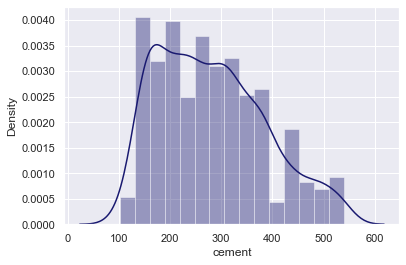

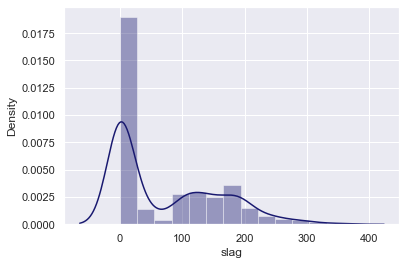

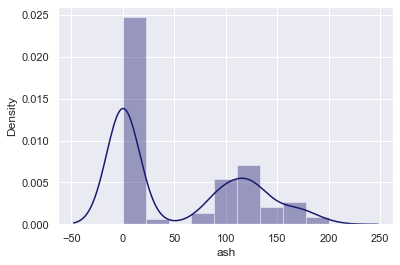

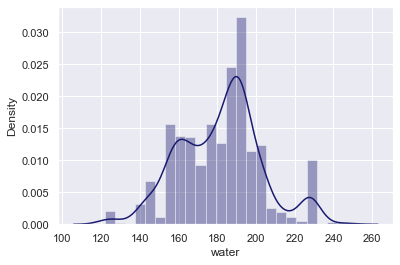

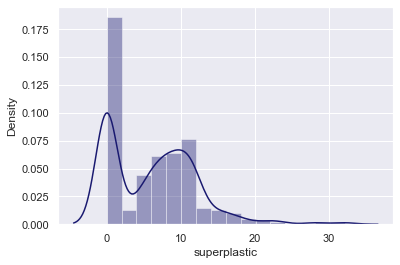

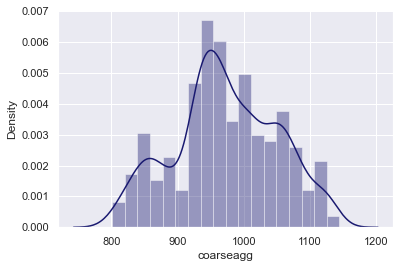

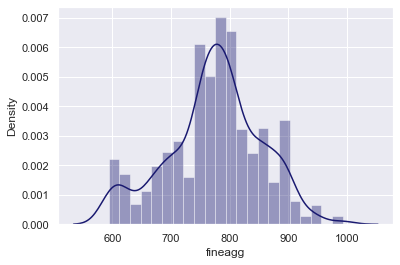

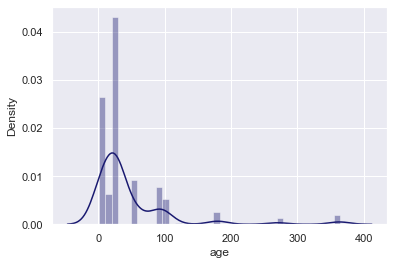

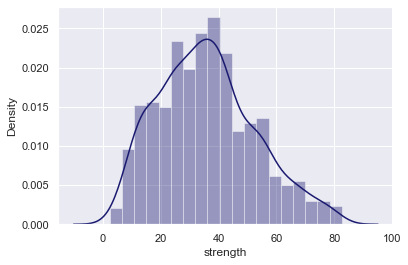

In [8]:
for i in pdata.columns:
    plt.figure(i)
    sns.distplot(pdata[i],color = 'midnightblue');

#### <font color='blue'>The distribution plots indicate uniform  distributions for most of the attributes<br><br><li>Attributes Age, Superplastic has a long right tail indicating high positive skewness</li><br><br><li>Many attributes show a "multi-modal" distribution, probably indicating that there are 2 or more clusters in the data set</li></font>

#### 2.2 Find skewness of distribution for all attributes

In [9]:
table=[['Attribute','Skewness']]
for i in pdata.columns:
    l = [i,round(pdata[i].skew(),2)]
    table.append(l)
display_table(table)

#### <font color='blue'>Inferences:<br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li>Most of the attributes have a multi-modal distribution with <i>two or three distinct peaks</i></li><br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li><i>Age</i> has a very highly skewed distribution (+3.27) with a long right tail<br><br>&nbsp;&nbsp;&nbsp;&nbsp;<li><i>Superplastic, cement, ash and strength</i> have a distinct right tail indicating a moderately positive skewed distribution<br><br>&nbsp;&nbsp;&nbsp;&nbsp;<br><br>The inferences are further confirmed by the Box Plots for all attributes, that are shown below</font>

### 1.b.i. Bivariate Analysis

#### Analysis using Box plots

<AxesSubplot:>

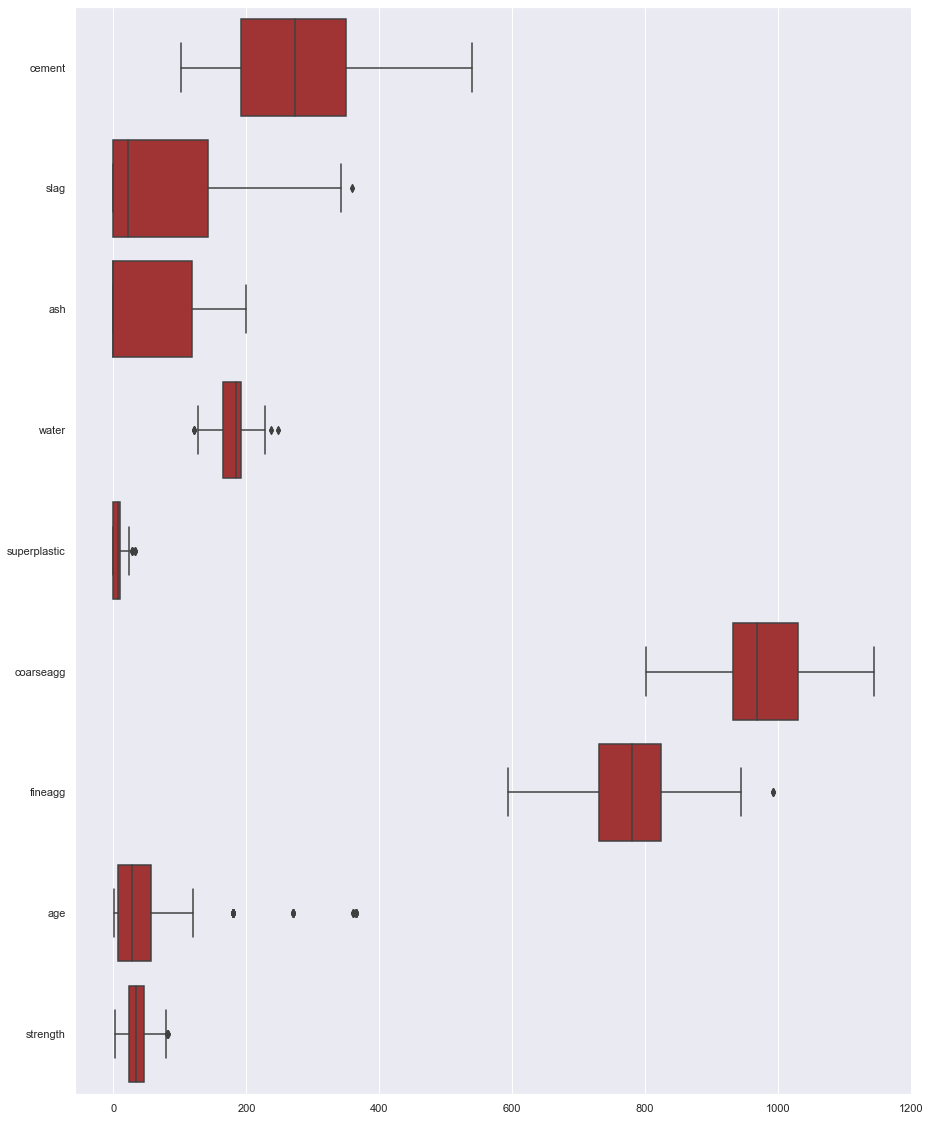

In [10]:
plt.subplots(figsize=(15,20))
sns.boxplot(data=pdata,orient='h', color="firebrick")

#### Analysis using correlation heat map

<AxesSubplot:>

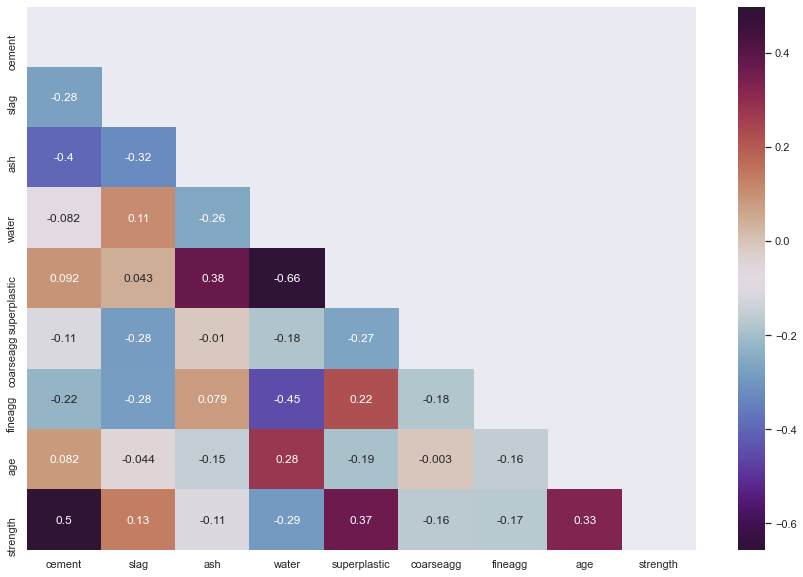

In [11]:
plt.subplots(figsize=(15,10))
matrix = np.triu(pdata.corr())
sns.heatmap(pdata.corr(),cmap='twilight_shifted',annot=True, mask=matrix)

#### <font color='#154360'>Inferences:<br><br>1. No two attributes have very high (|C| > 0.7) level of correlation, either positive or negeative<br><br>2. <i>superplastic, water</i> have the highest negative correlation (-0.66)<br><br>3. <i>cement</i> has the highest correlation with <i>strength</i> (0.5), indicating that it is a very important feature that determines the dependent variable. <i>superplastic, age</i> also have a moderate level of positive correlation with strength indicating predictive power of these variables. <br><br>We will assert or negate these observations by determining feature importances, later in this assignment</font>

#### Pairplots of all attributes

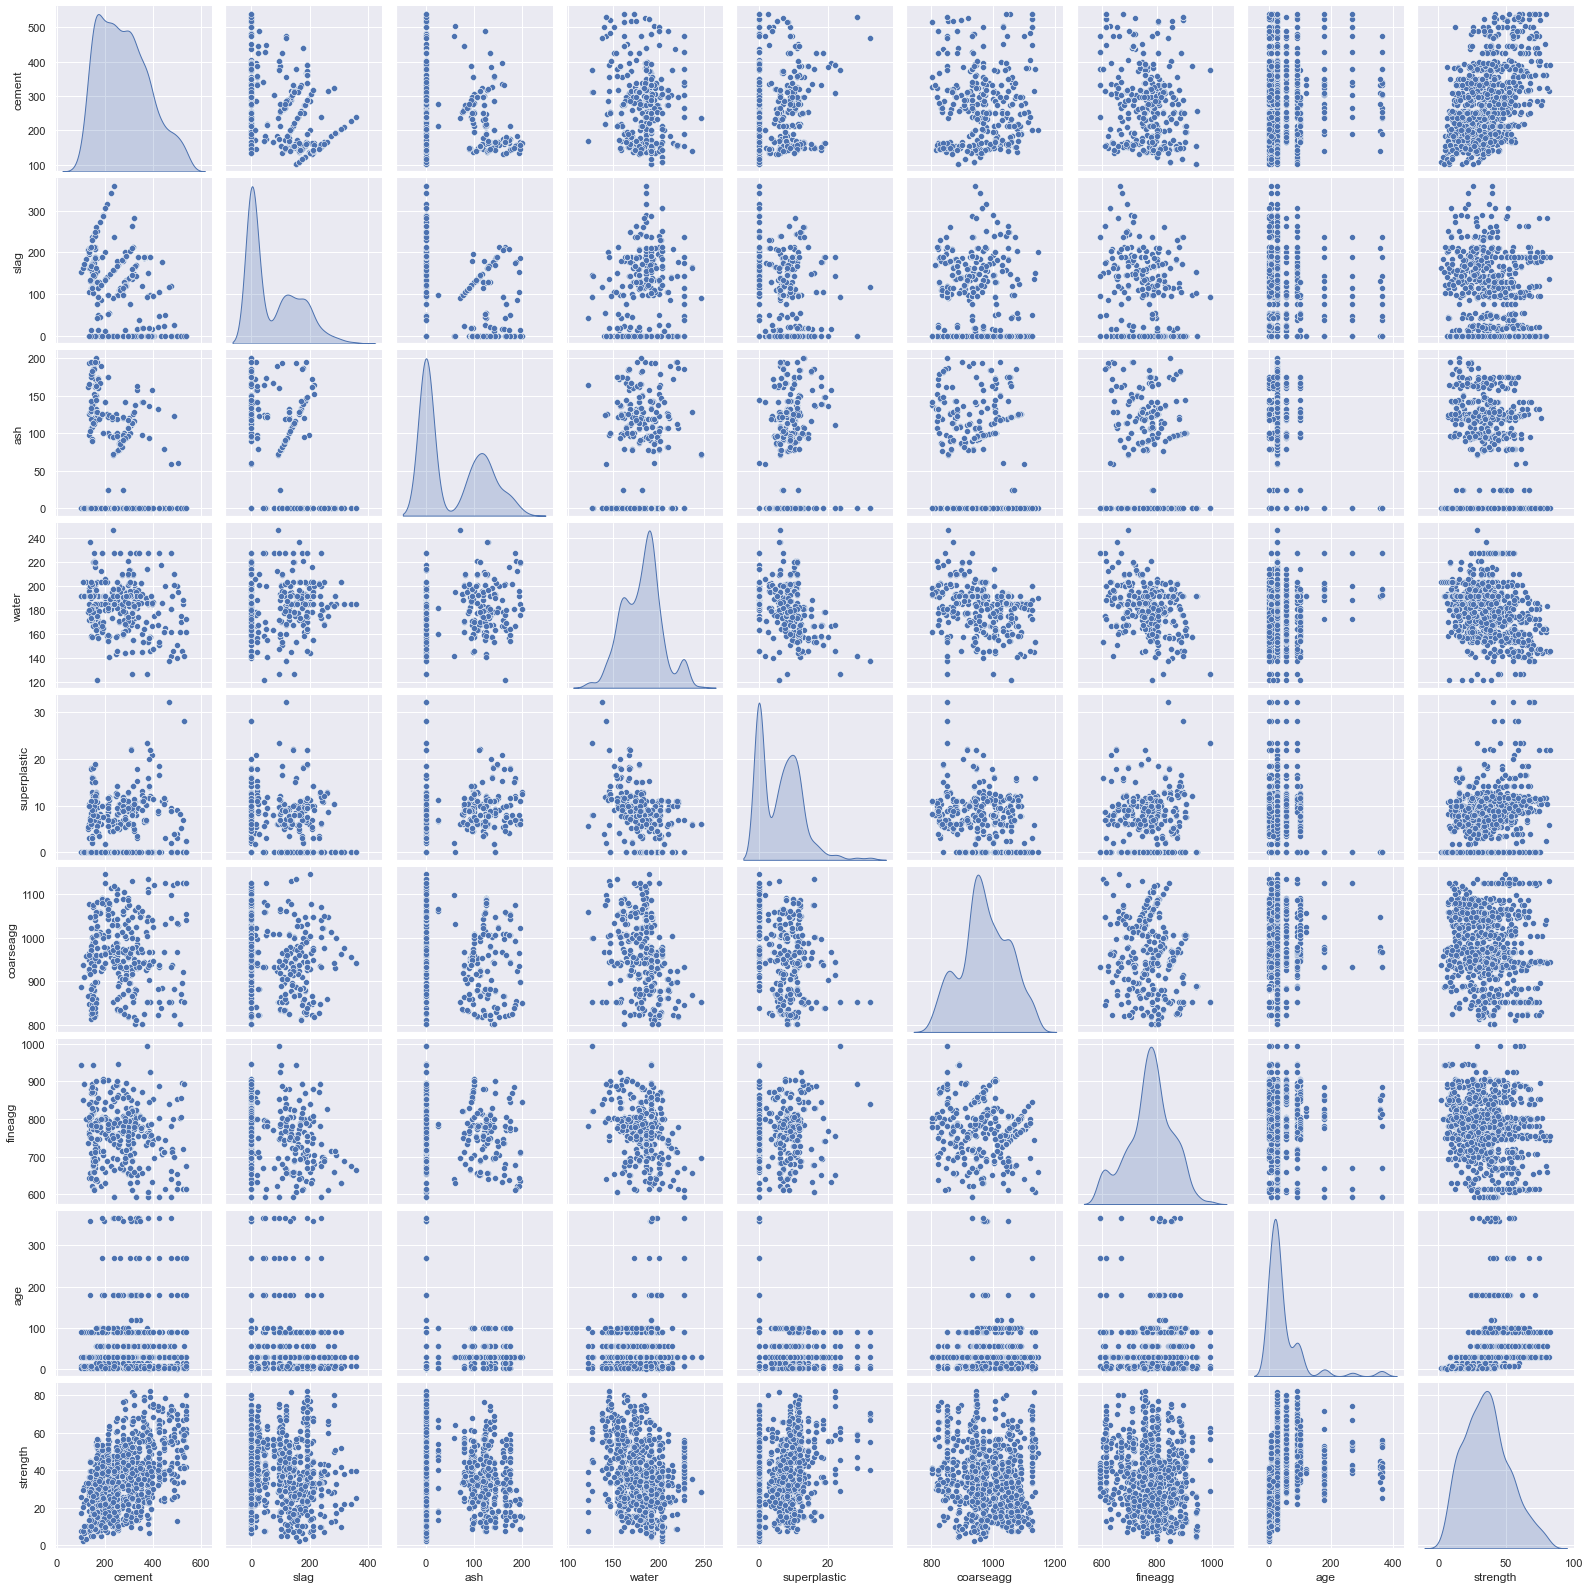

In [12]:
sns.pairplot(pdata,diag_kind='kde')

#### <font color='#B03A2E'>Inferences<br><br><li><i>cement</i> is the only variable that has a linear relationship with target variable <i>strength</i>.  This is a good indicator that a linear model may not be the most appropriate, and a 2nd or 3rd degree polynomial may perform better than a linear model.</li><br><li><i>strength, cement</i> have a normal distribution. The other attributes are seen to have more outliers</li><br><li><i>slag, ash, superplastic</i> have two distinct peaks. They also exhibit a relatively high skewness compared to <i>cement, strength</i></li><br><li><i>age</i> is very highly skewed and has about 4-5 Gaussian peaks along its long right tail</li><br><li><i>coarseagg, fineagg</i> are normally distributed with a slight left tail i.e. negative skewness. They also exhibit 2-3 distinct peaks</li><br><li>There seems to be a linear relation between <i>ash and slag</i>. In other words, there is some multi-colinearity among independent attributes that needs to be handled</li></font>
<font color='#1B4F72'><li><i>cement, strength</i> have moderately positive correlation, as observed in the heat map</li><br><li>None of the other independent variables correlate well with strength and hence could be weak predictors</li></font>

#### 1.c. Outlier treatment

#### <font color='blue'>Since <i>age and superplastic</i> have high skewness with a large number of outliers, we will perform outlier treatment for them. An outlier is defined as a data point that is more than 2 standard deviations away from the median age. In this solution, we have replaced all <i>age and superplastic</i> outliers with <i>median age and superplastic</i> values.<br><br> <font color='red'>This is a key step in improving the model performance</font></font><br><br><font color='#145A32'><u>Notes</u><br><br><li>An alternate strategy to define outliers is to use the IQR. For e.g. we could have picked data points P such that [P >  q3+1.5*IQR, P < Q1-1.5*IQR] and replaced them with median values</li><br><li>I decided to not perform outlier treatment for other attributes because the skewness levels are moderate and not very high.</li></font>

In [13]:
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation 
    outliers = (group - median).abs() > 2*std # Subtract median from every member. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

y=pdata['age']
pdata.drop(['age'],axis=1)
age_outc = (y.transform(replace)) 
pdata.add(age_outc,axis=0)

z=pdata['superplastic']
pdata.drop(['superplastic'],axis=1)
sp_outc = (z.transform(replace)) 
pdata.add(sp_outc,axis=0)
pdata.head(20)

d:\spyder\envs\py36-test\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\spyder\envs\py36-test\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


#### Box Plots after outlier treatment

<AxesSubplot:>

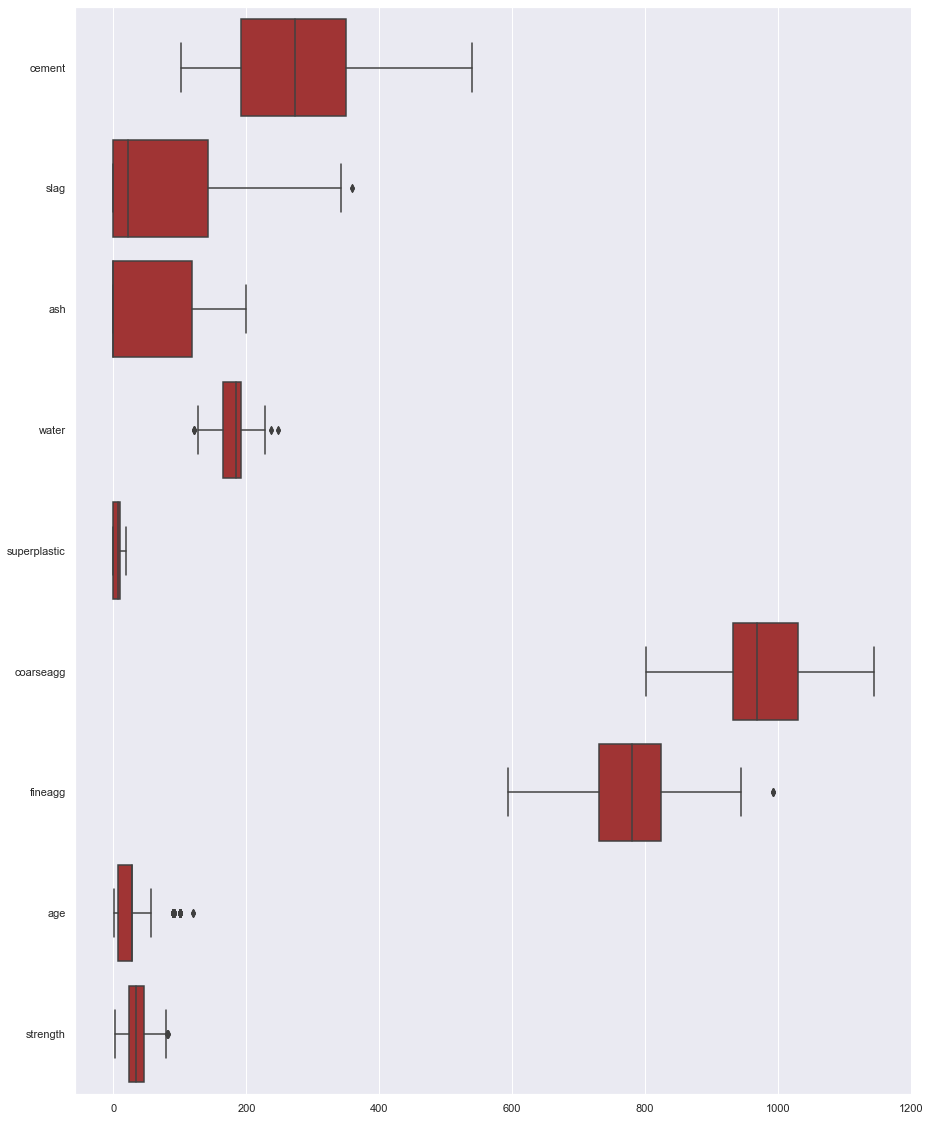

In [14]:
plt.subplots(figsize=(15,20))
sns.boxplot(data=pdata,orient='h', color="firebrick")

#### <font color='brown'>The above box plot confirms that many outliers have been removed for <i>age</i> and <i>superplastic</i> attributes. Even after outlier treatment, there will be some outliers that will remain. Let us confirm the quantitative change in skewness values after outlier treatment</font>

#### Skewness values after outlier treatment

In [15]:
table=[['Attribute','Skewness']]
for i in pdata.columns:
    l = [i,round(pdata[i].skew(),2)]
    table.append(l)
display_table(table)

#### <font color='#5B2C6F'>From the above skewness table, we can confirm that<br><br><li>Skewness of <i>age</i> reduced to 1.29 from previous value of 3.27</li><br><li>Skewness of <i>superplastic</i> reduced to 0.2 from previous value of 0.91</li><br>This confirms that data set is treated for outliers, which will enhance the performance of the training models</font>

### 2. Feature Engineering Techniques

#### <font color='#943126'>Looking at the pair plots, there seems to be 2 or more Gaussians. We will use K-Means clustering to group the data points into clusters and identify the strong/weak predictors in the feature set</font>

In [16]:
#Create clusters from the data set and observe errors vs # of clusters
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(pdata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.752609e+07
1,2,2.820742e+07
2,3,2.172413e+07
3,4,1.891774e+07
4,5,1.677009e+07
5,6,1.511072e+07
6,7,1.367739e+07
7,8,1.252060e+07
8,9,1.136427e+07
9,10,1.052361e+07


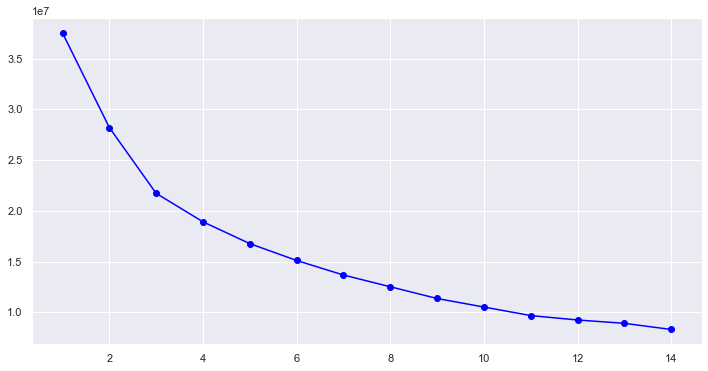

In [17]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o", color='blue')

#### <font color='#21618C'>The elbow of the curve appears to be at k=3 clusters. Hence we will use 3 clusters in K-Means algorithm</li></font>

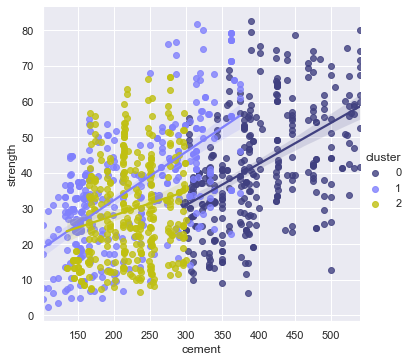

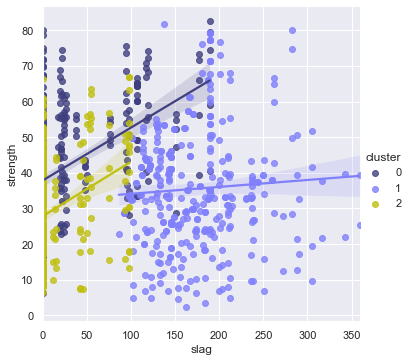

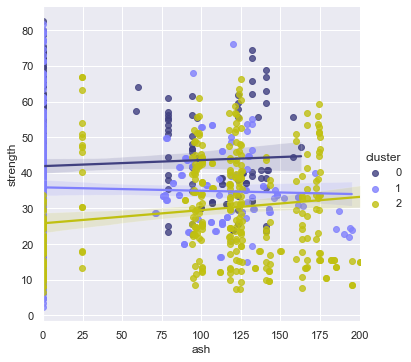

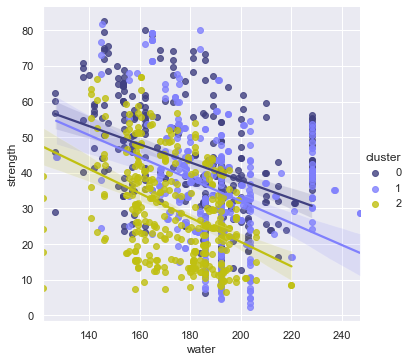

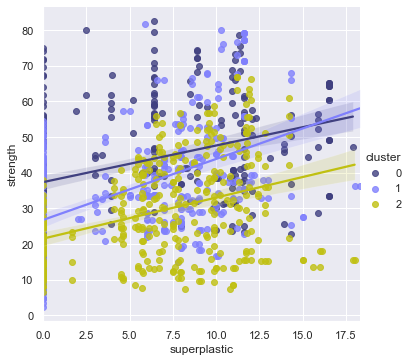

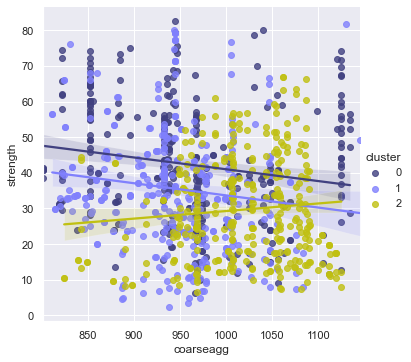

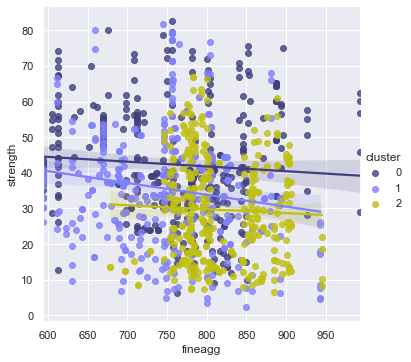

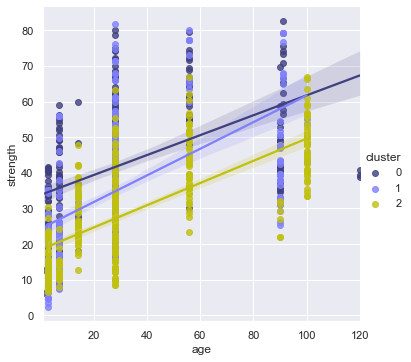

In [18]:
kmeans = KMeans(n_clusters=3, n_init = 5, random_state=42)

from scipy.stats import zscore

pdata_copy = pdata.copy(deep=True)
pdata_copy.apply(zscore)
kmeans.fit(pdata_copy)
pred = kmeans.predict(pdata_copy)
pdata_copy['cluster'] = pred

for cols in pdata_copy.columns[:-2]:
  sns.lmplot(data=pdata_copy, x=cols, y='strength', hue='cluster', palette="gist_stern")

#### <font color='#1B4F72'>The above plots indicate the following w.r.t the prediction strength of independent attributes<br><br><li><i>age, cement, water, slag</i> have well-sloped lines and hence are strong predictors. They have to be definitely retained in the data set for training the models</li><br><br><li><i>ash, coarseagg, fineagg</i> have near-straight lines in the plots and hence are weak predictors. They may well be removed from the data set without much impact to the prediction</li><br><br><li><i>superplastic</i> is a moderate predictor and will be retained in the data set for training</li></font>

### 3. Establishing Feature Importances

#### <font color='blue'>Use K-Means, we got an idea of the predictive power of independent variables. Let us confirm this further by using a DecisionTree model and observe the importance of features. We will use 70% of data for training and 30% for testing. We normalize the data set before training models on it, so that all attributes are standardized to one scale</font>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate the independent and dependent variables. 
#Drop 'strength', the dependent variable 
X = pdata.drop(['strength'],axis=1)
#Convert attributes to z-Scores in order to normalize the units
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

y = pdata['strength']

x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=42)

Training Accuracy: 99.0 %
Test Accuracy: 83.0 %


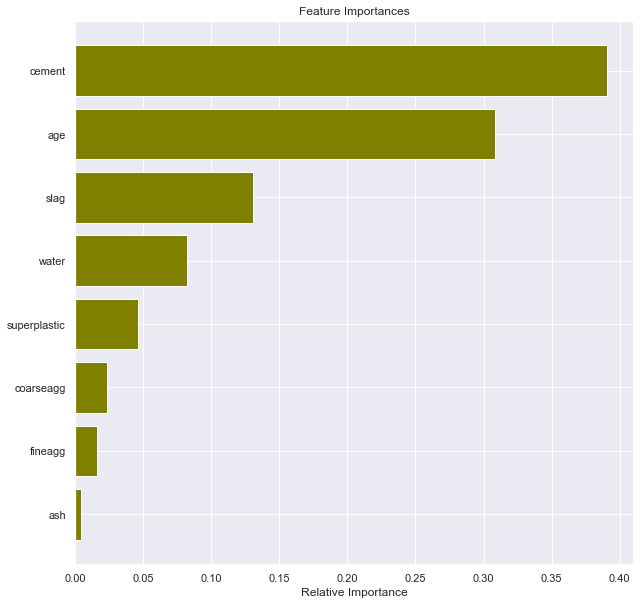

In [20]:
dTree = DecisionTreeRegressor()
dTree.fit(x_train , y_train)

print("Training Accuracy:",100*round(dTree.score(x_train, y_train),2),"%")
print("Test Accuracy:",100*round(dTree.score(x_test, y_test),2),"%")


features = x_train.columns
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='olive', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### <font color='#196F3D'>The above diagram confirms further that<br><br><li><i>cement, age, slag, water</i> add up to ~90% and are the most significant predictors</li><br><li><i>superplastic, coarseagg, fineagg, ash</i>  are weak predictors, as they  contribute overall to less than 10% in predicting the dependent variable</li><br><br>However, on seeing the training and test accuracy values, it is obvious that the model is overfitting the data points. Hence, we need to tune the model by pruning the decision tree to have only 5 levels of depth</font>

#### Regularizing the Decision Tree Regressor

Training Accuracy: 81.0 %
Test Accuracy: 72.0 %


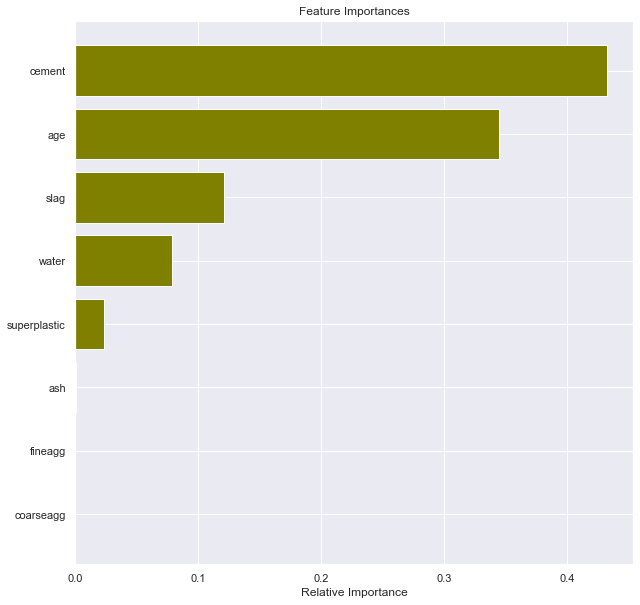

In [21]:
dTree_Reg = DecisionTreeRegressor( max_depth = 5,random_state=42,min_samples_leaf=4)
dTree_Reg.fit(x_train, y_train)

print("Training Accuracy:",100*round(dTree_Reg.score(x_train, y_train),2),"%")
print("Test Accuracy:",100*round(dTree_Reg.score(x_test, y_test),2),"%")

features = x_train.columns
importances = dTree_Reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='olive', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### <font color='#196F3D'>The above plot <i>further confirms</i> that<br><br><li>cement, age, slag and water are the most significant predictors</li><br><li>Superplastic, coarseagg, fineagg and ash are weak predictors</li><br><br>Moreover, the training and test accuracy values indicate that the overfitting has been reduced through decision tree pruning<br><br><li><i>water</i> has a strong negative correlation with <i>superplastic</i> and <i>fineagg</i>. Hence, we might need to retain these variables although they seem to be weak predictors<br><br><li>By the same logic, <i>ash</i> negatively correlates with <i>cement</i> and hence we will keep it for model training</li><br><br><li>It is decided that only <i>coarseagg</i> attribute will be dropped for model training because it is neither a strong predictor nor does it have strong negative correlation with any other attribute</li></font>

### 4. Creating and tuning Regression Models

#### 4.1 Model Training

#### <font color='#2874A6'>The step wise approach to tuning the model is described below<br><br><br><li>Since the dependent variable <i>strength</i> is continuous, we will use different Regression algorithms such as</font>
<font color='#6E2C00'>
<ol>Linear Regression</ol>
<ol>Linear Regression:2nd degree Polynomial</ol>
<ol>Linear Regression:3nd degree Polynomial</ol>
<ol>Ridge</ol>
<ol>Ridge:2nd degree Polynomial</ol>
<ol>Ridge:3nd degree Polynomial</ol>
<ol>Lasso</ol>
<ol>Lasso:2nd degree Polynomial</ol>
<ol>Lasso:3rd degree Polynomial</ol>
<ol>Decision Trees</ol>
<ol>Random forest</ol>
<ol>Ada boosting</ol>
<ol>Gradient boosting</ol>
<ol>KNN</ol>
<ol>Support Vector Machine</ol>
</font>
<br>
<font color='#2874A6'>
<li>We will use the above regression models to train the data set and compare accuracy parameters to pick the best model.</li><br><li>We have already treated outliers by replacing them with median values</li><br><li>We will normalize the data set before training models on it, so that all attributes are standardized to one scale</li><br><li>We will then use the earlier results from K-Means Feature Engineering and Decision Tree to train the data set only on the most important features and observe the accuracy scores</li><br><li>Finally, we will use RandomizedSearchCV to sample a given number of candidates from a parameter space with a specified distribution to further tune the model</li></font>

In [22]:
from sklearn.preprocessing import PolynomialFeatures

class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scaler if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps
    
    #Returns the name of the Regression model
    def get_name(self):
        return self.name
    
    #Retruns the Regression model for fitting
    def get_model(self):
        return self.model
    
    #Returns the Pipeline object constructed based on the parameters passed to the constructor
    def get(self):
        return Pipeline(steps=self.steps)

#### Construct a list of Linear Regressors which will be used to train the model and for performance comparison 


In [23]:
regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression 2nd degree Polynomial', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression 3rd degree Polynomial', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge 2nd degree Polynomial', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge 3rd degree Polynomial', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso 2nd degree Polynomial', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso 3rd degree Polynomial', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('AdaBoost', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('RandomForest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient Boost', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('K-Nearest Neighbours', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

#### Comparison of Model performances with complete data set

In [24]:
# prepare the cross-validation procedure using 50 splits
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize the results table (used for display) header row
results = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Test Accuracy', 'CV Mean', 'CV Std Dev','95% confidence intervals'])

# Train and test all the regressors
for regressor in regressors:
    
    #Train the model using all features in the data set, including weak predictors
    regressor.get().fit(x_train, y_train)
    y_pred = regressor.get().predict(x_test)
    
    # Use K-Fold cross validation and obtain cross validation scores
    scores = cross_val_score(regressor.get(), X, y, cv=cv)
    
    #extract the performance metrics from cross validation scores
    mean = round(np.mean(scores),2)
    std = round(np.std(scores),2)
    conf_int = str(round(mean-(1.96*std),3)) + ' <--> ' + str(round(mean+(1.96*std),3))
    
    #extract model training and test accuracy in percentages
    training_acc= 100*round(regressor.get().score(x_train, y_train),2)
    test_acc = 100*round(regressor.get().score(x_test, y_test),2)
    
    # Append this model's metrics to the overall results table
    results = results.append({'Model':regressor.get_name(),'Training Accuracy':training_acc,'Test Accuracy':test_acc,'CV Mean':mean,'CV Std Dev':std,'95% confidence intervals':conf_int},ignore_index=True)

#Identify the best Regression model based on highest CV Mean metric and add it to the end of table
best_model = results.sort_values(['CV Mean'], ascending=False).head(1)
best_model['Model'] = 'Best Model = ' + best_model['Model']
results = results.append(best_model, ignore_index=True)

results

,Model,Training Accuracy,Test Accuracy,CV Mean,CV Std Dev,95% confidence intervals
0,Linear Regression,72.0,70.0,0.70,0.05,0.602 <--> 0.798
1,Linear Regression 2nd degree Polynomial,87.0,83.0,0.84,0.04,0.762 <--> 0.918
2,Linear Regression 3rd degree Polynomial,95.0,77.0,0.87,0.05,0.772 <--> 0.968
3,Ridge,72.0,70.0,0.70,0.05,0.602 <--> 0.798
4,Ridge 2nd degree Polynomial,87.0,83.0,0.84,0.04,0.762 <--> 0.918
5,Ridge 3rd degree Polynomial,94.0,86.0,0.89,0.04,0.812 <--> 0.968
6,Lasso,69.0,68.0,0.68,0.05,0.582 <--> 0.778
7,Lasso 2nd degree Polynomial,77.0,75.0,0.75,0.04,0.672 <--> 0.828
8,Lasso 3rd degree Polynomial,79.0,74.0,0.76,0.03,0.701 <--> 0.819
9,Decision Tree,73.0,67.0,0.67,0.07,0.533 <--> 0.807


#### <font color='#196F3D'>It can be seen, from the above results table, that <i><b><font color='blue'>Gradient Boosting Algorithm</font></b></i> is the best model based on the CV Mean, Training Accuracy and Testing Accuracy. We can be <font color='blue'><b>95%</b></font> confident that the model accuracy will be in the range  <font color='blue'><b>87-95% in production</b></font></font>

#### <font color='blue'>In the next step, we will remove the less important feature <b><font color='brown'>coarseagg</font></b> from the data set and evaludate all the models again. These features were earlier established as weak predictors using K-Means clustering and Decision Tree Regressor</font>

In [25]:
#Drop weak predictors from data set to check if that improves model performance
#X = pdata.drop(['strength','coarseagg','fineagg','ash'],axis=1)
X = pdata.drop(['strength','coarseagg'],axis=1)

#Convert attributes to z-Scores in order to normalize the units
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
y = pdata['strength']

x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=42)

In [26]:

# prepare the cross-validation procedure using 50 splits
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize the results table (used for display) header row
results_fe = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Test Accuracy', 'CV Mean', 'CV Std Dev','95% confidence intervals'])

# Train and test all the regressors
for regressor in regressors:
    
    #Train the model
    regressor.get().fit(x_train, y_train)
    y_pred = regressor.get().predict(x_test)

    # Use K-Fold cross validation and obtain cross validation scores
    scores = cross_val_score(regressor.get(), XScaled, y, cv=cv)
    
    #extract the performance metrics from cross validation scores
    mean = round(np.mean(scores),2)
    std = round(np.std(scores),2)
    conf_int = str(round(mean-(1.96*std),3)) + ' <--> ' + str(round(mean+(1.96*std),3))

    #extract model training and test accuracy in percentages
    training_acc= 100*round(regressor.get().score(x_train, y_train),2)
    test_acc = 100*round(regressor.get().score(x_test, y_test),2)

    # Append this model's metrics to the overall results table
    results_fe = results_fe.append({'Model':regressor.get_name(),'Training Accuracy':training_acc,'Test Accuracy':test_acc,'CV Mean':mean,'CV Std Dev':std,'95% confidence intervals':conf_int},ignore_index=True)

#Identify the best Regression model based on highest CV Mean metric and add it to the end of table 
best_model = results_fe.sort_values(['CV Mean'], ascending=False).head(1)
best_model['Model'] = 'Best Model = ' + best_model['Model']
results_fe = results_fe.append(best_model, ignore_index=True)
results_fe

,Model,Training Accuracy,Test Accuracy,CV Mean,CV Std Dev,95% confidence intervals
0,Linear Regression,72.0,70.0,0.70,0.05,0.602 <--> 0.798
1,Linear Regression 2nd degree Polynomial,85.0,81.0,0.82,0.03,0.761 <--> 0.879
2,Linear Regression 3rd degree Polynomial,92.0,86.0,0.87,0.03,0.811 <--> 0.929
3,Ridge,72.0,70.0,0.70,0.05,0.602 <--> 0.798
4,Ridge 2nd degree Polynomial,85.0,81.0,0.82,0.03,0.761 <--> 0.879
5,Ridge 3rd degree Polynomial,92.0,86.0,0.87,0.03,0.811 <--> 0.929
6,Lasso,69.0,68.0,0.68,0.05,0.582 <--> 0.778
7,Lasso 2nd degree Polynomial,77.0,75.0,0.75,0.04,0.672 <--> 0.828
8,Lasso 3rd degree Polynomial,79.0,75.0,0.76,0.03,0.701 <--> 0.819
9,Decision Tree,73.0,67.0,0.67,0.06,0.552 <--> 0.788


#### <font color='#E74C3C'>It can be seen, from the above results table, that <i><b><font color='green'>Gradient Boosting Algorithm</font></b></i> remains the best model based after removing the less important features. We can be <font color='blue'><b>95%</b></font> confident that the model accuracy will be in the range  <font color='blue'><b>85-97% in production</b></font>. In other words, the effect of removing weak predictors does not have a telling impact on the performance of all models</font>

#### <font color='#7D3C98'>At this point, we come to a decision that Gradient Boost Regressor is the best available model for predicting the concrete compressive strength based on the available features in the data set. We will consider it for further hyperparameter tuning. In the next step, we attempt to tune the hyperparameters using Randomized Search across the hyperparameter space. It is preferred over GridSearchCV as it has higher chance of hitting the right combination<br><br><font color='#C0392B'>Note: This step takes about 2 minutes to evaluate fully</font>
</font>

In [27]:
# Prepare the parameter grid for Randomized Search for Gradient Boost
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

#Perform RandomizedSearchCV on the HP space using specified parameter grid. 
#We will use 10-fold cross validations using 50 iterations

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=50)
rs.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=2)

In [28]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Best parameters: {rs.best_params_}")

results_rs = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy','CV Mean', 'CV Std Dev','95% confidence intervals'])
results_rs = results_rs.append({'Model':'Gradient Boost:RandomizedSearchCV','Training Accuracy':round(rs.cv_results_['mean_train_score'].mean(),2),'Testing Accuracy':100*round(rs.score(x_test, y_test),2),'CV Mean':round(mean,2),'CV Std Dev':round(std,2),'95% confidence intervals':str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))},ignore_index=True)
results_rs

Best parameters: {'subsample': 0.9, 'n_estimators': 350, 'max_leaf_nodes': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.2, 'criterion': 'mse'}


,Model,Training Accuracy,Testing Accuracy,CV Mean,CV Std Dev,95% confidence intervals
0,Gradient Boost:RandomizedSearchCV,0.93,91.0,0.92,0.03,0.849 <-> 0.983


#### <font color='#6C3483'>After RandomizedSearch CV HP tuning, the testing accuracy increased to <font color='blue'><b>91%</b></font>. We can be <font color='blue'><b>95%</b></font> confident that the model accuracy will be in the range  <font color='blue'><b>82-100%* in production</b></font>. In other words, there is a marginal but definitely an uptick in the model performance after hyperparameter tuning has been performed<br><br><font color=blue>*</font> - This range varies across different runs of the program, since it is a RandomizedSearch each time. However, it is in this ballpark range</font>

### Conclusion

#### <font color="#21618C"><li><font color='#D35400'><u>Outlier Treatment & Feature Scaling</u></font> : EDA performed on the data set indicated the presence of outliers for attributes such as <i>age, slag, ash</i>. Hence outlier treatment is the first step considered towards model performance tuning. Also, all models are trained on scaled data since <i>age</i> is on a different scale compared to other features and all of them need to be transformed to one standard range</li><br><li><font color='#D35400'><u>Feature Extraction using importances</u></font> : Using K-Means Clustering and Decision Tree Regressor, we found out the most important fetaures that determine the cement strength - found that <i>cement, age, slag, water</i> were the strong predictors and others as moderate to weak predictors. Removing the weak predictors may improve the performance of the model. </li><br><li><font color='#D35400'><u>Regression Algorithms & K-Fold Cross Validation</u></font> : Since the output variable is continuous, we have chosen Regression algroithms for training. We trained the complete data set across multiple Regressor alogorithms. Moreover, we have used K-Fold cross validation with 10 folds (K=10 as per standard practice) to quote the model accuracy at 95% confidence inteval. We will use Cross-Validation Mean as the key parameter to evaluate model performance</li><br><li><font color='#D35400'><u>Model training and Performance comparison</u></font> : It is observed that Gradient Boosting is the best performing algorithm. Also, Linear Regression & Ridge algorthims with 3rd degree polynomials also provide higher model accuracy. So the combinations of various fetaures such as <i>cement, water, ash</i> etc. are important in determining the cement strength rather than just independent features</li><br><li><font color='#D35400'><u>Feature Removal</u></font> : We tried removing the weak predictor (<i>coarseagg</i>) to see if that changes the overall and relative performance of the various regression models. Gradient Boosting was still the best performing model followed by LR 3rd degree and Ridge 3rd degree</li><br><li><font color='#D35400'><u>Hyperparameter Tuning</u></font> : We chose RandomizedSearchCV as the method for searching the hyperparameter space because it has a higher chance of finding the optimal combination , compared to GridSearchCV</li><br><li>The features <i>cement, age, slag and water</i> are the strong predictors of the cement <i>strength</i>. The relative proportions of these materials are also important when predicting the cement <i>strength</i></li></font>